**STEP 1**:
Download OpenAI Gymnasium

In [1]:
!pip install gymnasium[classic_control]

**STEP 2**:
Import Libraries

In [2]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


**STEP 3**:
Create Gym Environment

In [3]:
env = gym.make("CartPole-v1")

**STEP 4**:
Data Generation Using Simulation

In [4]:
def run_episode():
    state, _ = env.reset()
    total_reward = 0

    done = False
    while not done:
        # Random policy (not learning!)
        action = env.action_space.sample()
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward

    return state, total_reward


# Run multiple simulations
data = []

NUM_EPISODES = 1000

for _ in range(NUM_EPISODES):
    initial_state, episode_reward = run_episode()
    data.append([
        initial_state[0],  # cart position
        initial_state[1],  # cart velocity
        initial_state[2],  # pole angle
        initial_state[3],  # pole angular velocity
        episode_reward
    ])

columns = [
    "cart_position",
    "cart_velocity",
    "pole_angle",
    "pole_angular_velocity",
    "episode_reward"
]

df = pd.DataFrame(data, columns=columns)

**STEP 5**:
Train-Test Split & Scaling

In [5]:
X = df.drop("episode_reward", axis=1)
y = df["episode_reward"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**STEP 6**:
ML Models

In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append([name, mae, rmse, r2])

**STEP 7**:
Results Table

In [7]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

print(results_df.sort_values("RMSE"))


               Model       MAE      RMSE  R2 Score
4      Random Forest  5.708250  7.217598  0.397069
2                KNN  5.630000  7.283928  0.385936
5  Gradient Boosting  5.937282  7.401122  0.366017
1   Ridge Regression  7.549816  9.557745 -0.057288
0  Linear Regression  7.551647  9.559799 -0.057742
3      Decision Tree  7.360000  9.779571 -0.106935


**STEP 8**:
Visualization (Best Model)

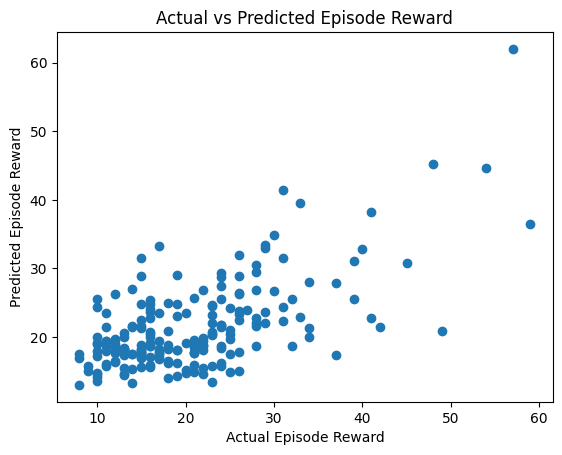

In [8]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
best_preds = best_model.predict(X_test)

plt.figure()
plt.scatter(y_test, best_preds)
plt.xlabel("Actual Episode Reward")
plt.ylabel("Predicted Episode Reward")
plt.title("Actual vs Predicted Episode Reward")
plt.show()

env.close()